<a href="https://colab.research.google.com/github/Himanshucode77/Scaler-/blob/main/%20%20%20%20%20%20%20%20%20%20%20AeroFit_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Problem Statement**


The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

* Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.


* For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

* Based on the data we have to generate a set of insights and recommendations that will help the company in targetting new customers

# **Dataset**



The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

* **Product Purchased** :	KP281, KP481, or KP781
* **Age**:	In years
* **Gender**:	Male/Female
* **Education**:	In years
* **MaritalStatus**:	Single or partnered
* **Usage**:	The average number of times the customer plans to use the treadmill each week.
* **Income**:	Annual income (in $)
* **Fitness**:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* **Miles**:	The average number of miles the customer expects to walk/run each week


**Product Portfolio** :

* The KP281 is an entry-level treadmill that sells for $1,500.

* The KP481 is for mid-level runners that sell for $1,750.

* The KP781 treadmill is having advanced features that sell for $2,500.

# **Analysing basic metrics**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

In [ ]:
df.head(5)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.shape

(180, 9)

Aerofit Data has 180 rows & 9 columns.

In [ ]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

**Observation**:

* Product,Gender and Martial status are string datatype.
* While Age, Education,Usage,Fitness,Income,Miles are integer datatype.

# **Data Preprocessing**

In [ ]:
#changing it to  object dtype to category  to save memory

df.Product=df["Product"].astype("category")
df.Gender=df["Gender"].astype("category")
df.MaritalStatus=df["MaritalStatus"].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df.isnull().sum()


Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

**Observation**: There are no missing or duplicate values in the dataset


# **Value counts and unique attributes ​​**

In [ ]:
col =['Product','MaritalStatus','Usage','Fitness','Education','Age']

In [ ]:
for i in col: 
    print('{} :{}'. format(i,df[i].unique()))

Product :['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']
MaritalStatus :['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']
Usage :[3 2 4 5 6 7]
Fitness :[4 3 2 1 5]
Education :[14 15 12 13 16 18 20 21]
Age :[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]


Observation:

* There are 3 different treadmills products.
* There are both Partnered and single customers.
* Age of customers ranges from 18 to 50.
* Education in years is from 12 -21.
* Usage is from 2 days to 7 days a week.
* Fitness level of customers from 1 -5

In [ ]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,KP281,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


**Observation**:

* Age of customer using treadmill is between range 18 - 50 . Average age is 28.78 and median is 26.
* Maximum income of treadmill user is 100K , Average income approx. 54K ,while median is is approx. 51K.
* Expected Treadmill usage is atleast Once a week , maximum is 7 times a week and on Average 3 times a week
* Customer education is between 12 -21 years, with average and median of 16 years and maximum of 21 years
* Customer expects to runs on an average of 103.19 miles per week, median 94 miles per week.
* Average self rated fitness is 3.

In [ ]:
df.Product.value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

**Observation**: KP281 treadmill model is most sold model.

In [ ]:
df.Fitness.value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

**Observation**: Most customer's fitness is average to excellent.

In [ ]:
df.Usage.value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

**Observation**: Most customers use it average 2,3 or 4 times in a week.

In [ ]:
df.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

**Observation**: There are 76 female and 104 males customers. More Male customers are buying treadmill compared to female customer

In [ ]:
df.MaritalStatus.value_counts()   

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

**Observation**: There are 107 Partnered and 73 single customers. Customers who are Partnered are buying treadmill more compared to single customer.

# **Examine Data(Product wise)** 

In [ ]:
df.loc[df['Product']=='KP281'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


 **OBSERVATIONS**

* 80 customers bought KP281 model
* Average age of customer who purchases KP281 is 28.5 , Median is 26 . Data is right skewed.
* Average Education is 15 and median is 16.
* Expected usage is 3 day a week
* Expected Miles to run is on an Average 82.78 miles per week and median is 85.
* Self rated fitness is 3 that is average fitness level
* Average income and median is around $46K.


In [ ]:
df.loc[df['Product']=='KP481'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


**OBSERVATIONS**

* There are 60 customers who purchased KP481 Model
* Average age of customer who purchases KP481 is 28.9 , Median is 26 . Age is right skewed. Customer range is between 24-33.
* Average Education is 15 and median is 16.
* Expected usage is 3 day a week
* Expected Miles to run is on an Average 60 miles per week and median is 85.
* Average Income is 48973$.  


In [ ]:
 df.loc[df['Product']=='KP781'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


**OBSERVATIONS**

* Average age of customer who purchases KP781 is 29 , Median is 27 .
* Average Education is 17 and median is 18.
* Expected usage is 4-5 day a week
* Expected Miles to run is on an Average 166 miles per week and median is 160.
* Average Income is 75K and median is 76K

# **Univariate Analysis**

**Histplot & Boxplot**

In [ ]:
def plot_uni(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(d, kde=True, ax=ax[0])
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [ ]:
num_cols = df.select_dtypes('int64').columns.values
num_cols

array(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'],
      dtype=object)

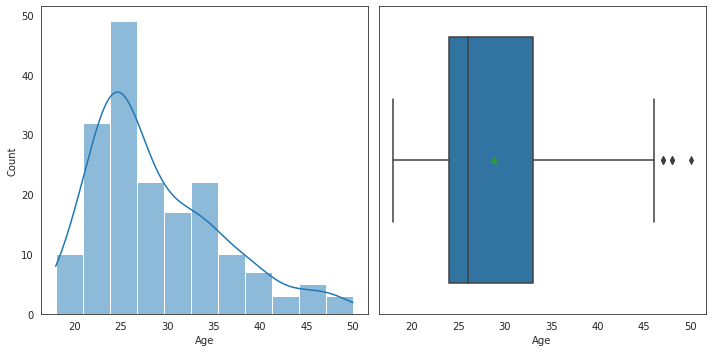

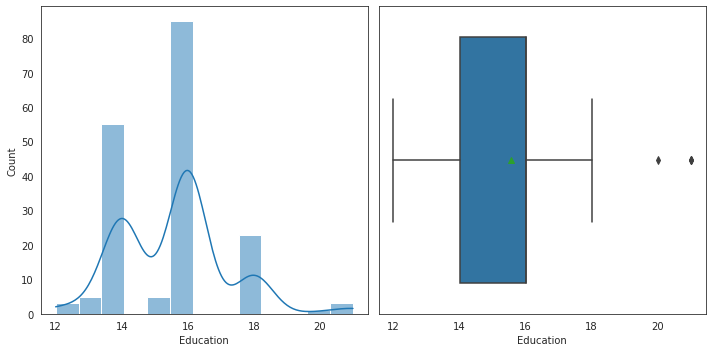

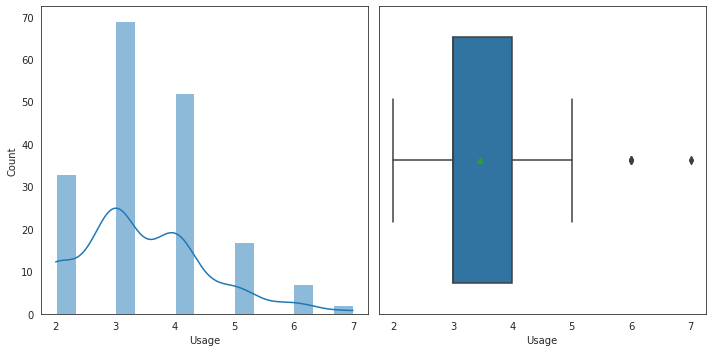

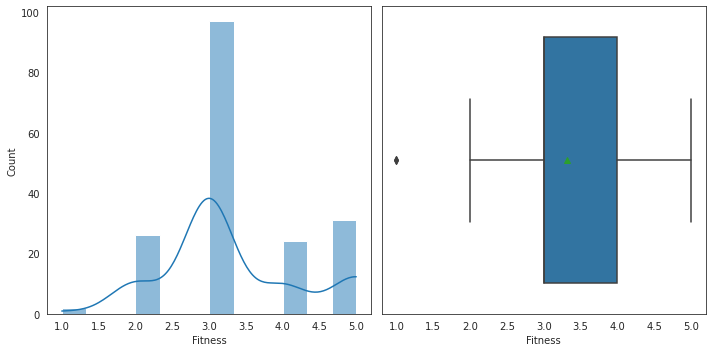

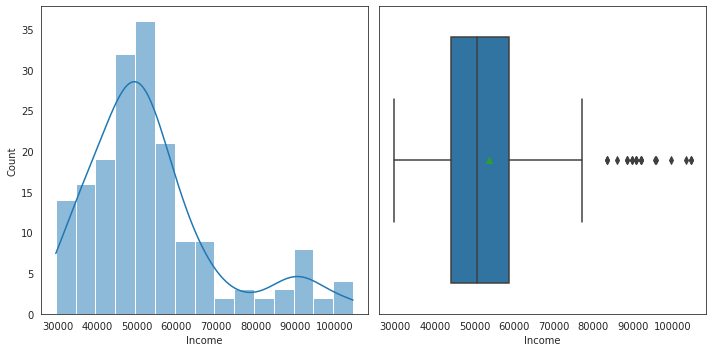

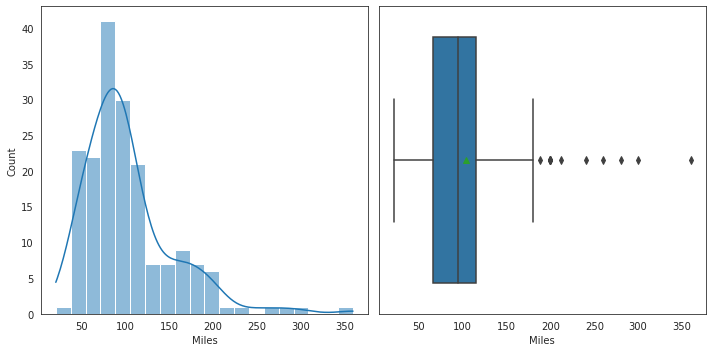

In [ ]:
for i in num_cols:
    plot_uni(df[i])

**Age**

* Age is skewed towards right.
* Customers buying treadmill after age of 40 and before 20 are very less.

**Education**

* Most customers have 16 years of Education.
* There are few outliers (higher end).

**Usage**

* Most user loves to use Treadmills 3-4 times/week.
* There are few outliers (higher end).

**Fitness**

* Most customer have 3-3.5 fitness rating (moderate fit).
* Very few customers that uses treadmill have low score i.e 1. that a great news ;).


**Income**

* Income is skewed toward right.
* Income may have outliers (higher end) as there are very few persons who earn >80k.
* Most customers have income less than 70k.


**Miles**

* Miles is skewed towards right.
* Customers run on an average 80 miles per week.
* There are some outliers, where customers are expecting to run more than 200 miles per week.

**Countplot**

In [ ]:
def plot_uni_cat(d):
    sns.countplot(d)
    plt.show()

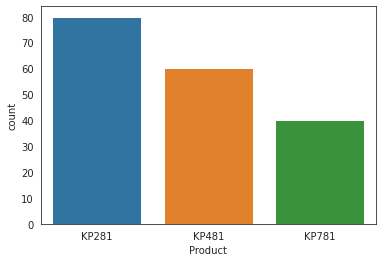

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


In [ ]:
plot_uni_cat(df['Product'])
print(df.Product.value_counts())

**Observation**: KP281 model is the most sold among all three. 

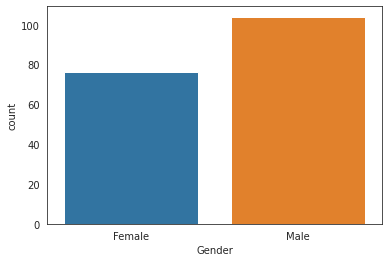

Male      104
Female     76
Name: Gender, dtype: int64


In [ ]:
plot_uni_cat(df['Gender'])
print(df.Gender.value_counts())

**Observation**: Majority of the buyers are males. There are 104 males in comparison to 76 females.

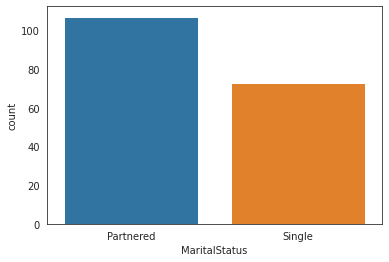

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


In [ ]:
plot_uni_cat(df['MaritalStatus'])
print(df.MaritalStatus.value_counts())

**Observation**: Majority of buyers are Partnered.

# **Bivariate Analysis**

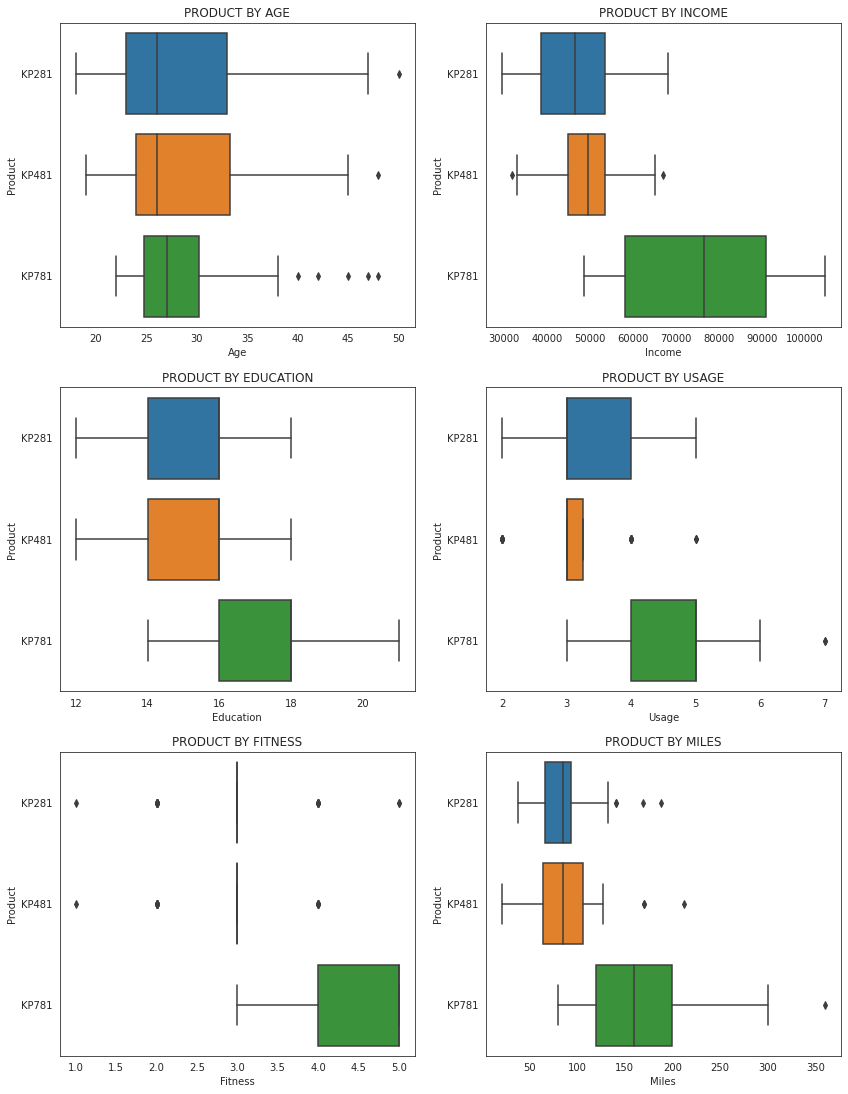

In [ ]:
#BiVariate Analysis for 
#1.Product & Age
#2.Product & Income
#3.Product & Education
#4.Product & Usage
#5.Product & Fitness
#6.Product & Miles
fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
#instead of writing  boxplot 6 times using for loop
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    
    sns.boxplot(df[list1_col[i]],df['Product'],ax=ax).set(title='PRODUCT BY ' + list1_col[i].upper()  )
    


**Observations**:-

* There are many outliers for KP781 ,customers are more than age of 40 .
* Age of customers buying KP281 and KP481 is between 20-35, where as customers buying KP781 are primarily in 25-30
* Customers with higher income and more education have purchased KP781 model.
* Customers with lower income purchase KP281 and KP481 model may be because of cost of the Treadmill
* Customer with KP281 expect to use treadmill 3-4 times a week and have average self rated fitness as 3 and some unfits.
* Customers who bought KP481 model expecting to use Treadmill less frequently but to run more miles a week.
* Customer buying KP781 plan to use it more frequently , run more miles and have high self rated fitness .They seem to be more health conscious or professionals.
* KP781 model was purchased more by males customer than female customers .
More partnered customer tend to buy KP781 than Single customers

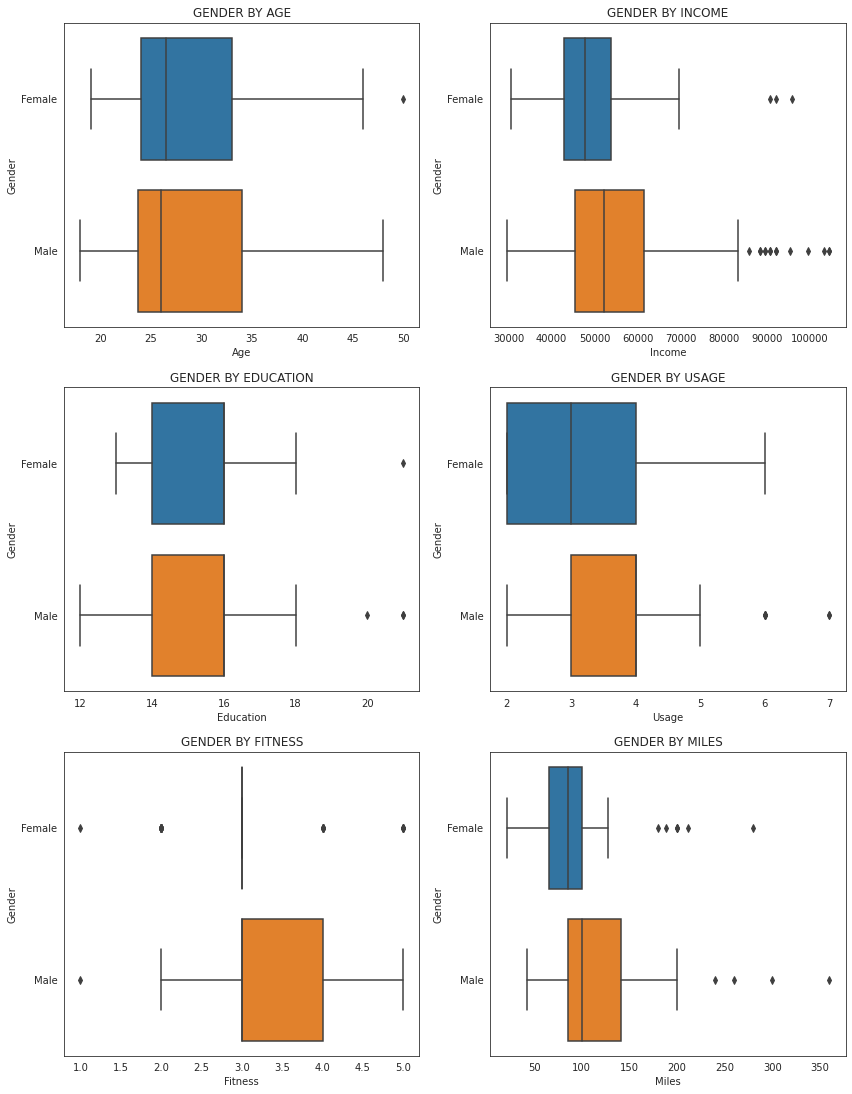

In [ ]:
#Bivariate Analysis for 
#1.Gender & Age
#2.Gender & Income
#3.Gender & Education
#4.Gender & Usage
#5.Gender & Fitness
#6.Gender & Miles

fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
# to plot graph side by side.
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(df[list1_col[i]],df['Gender'],ax=ax).set(title='GENDER BY ' + list1_col[i].upper()) 

**Observations**:-

* Male customers earn more than Female customers.
* Males Customer have higher self rated fitness than female.
* Expected Usage and miles covered on tread mill is less in Female customers than male customers.
* Female in age range 23-33 purchased the treadmill.
* Education of Male and Female customers is same.

<Figure size 504x504 with 0 Axes>

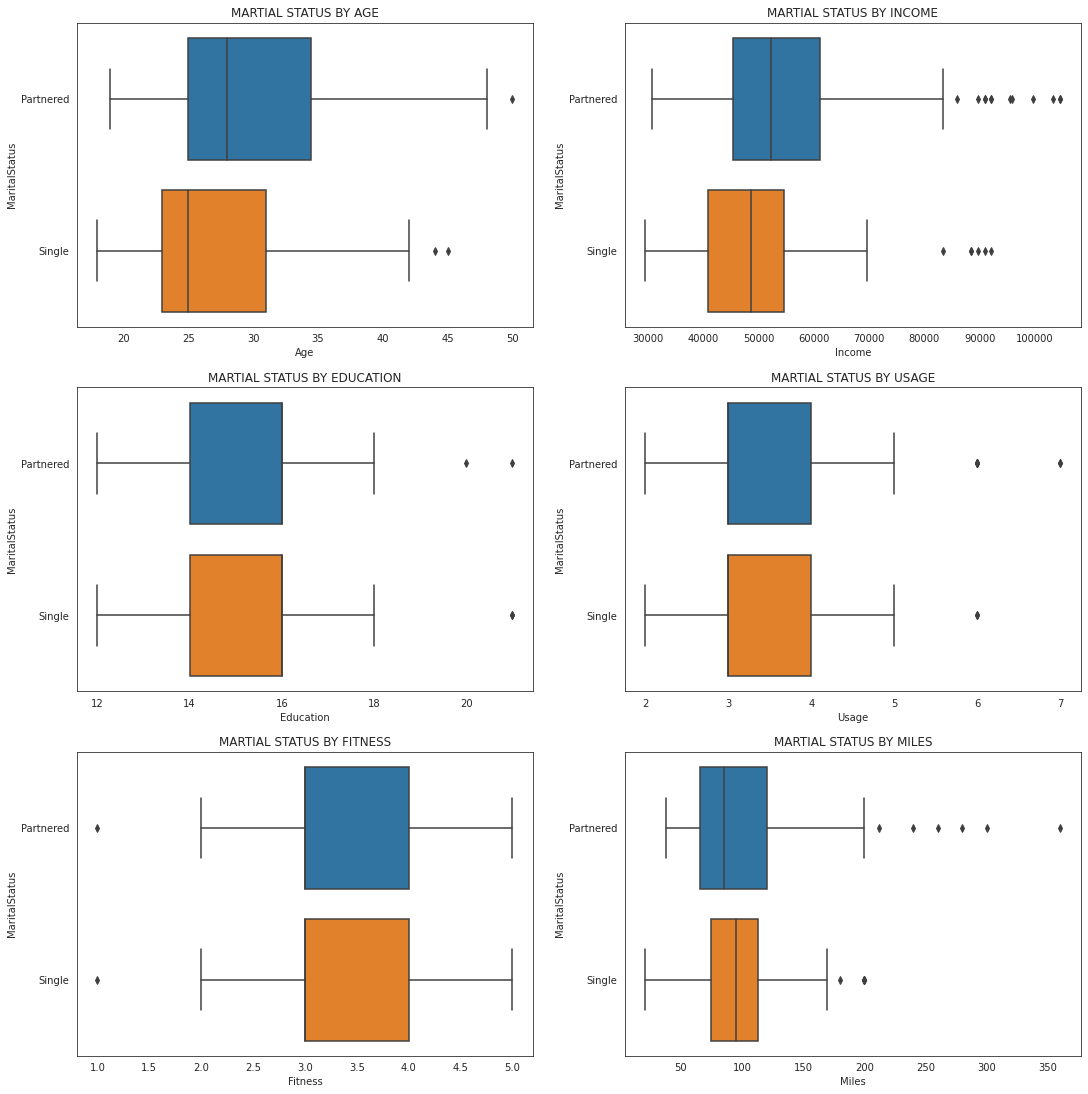

In [ ]:
#Bivariate Analysis for 
#1.Martial Status & Age
#2.Martial Status & Income
#3.Martial Status & Education
#4.Martial Status & Usage
#5.Martial Status & Fitness
#6.Martial Status & Miles
plt.figure(figsize=(7,7))
fig1, axes1 =plt.subplots(3,2,figsize=(18, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(df[list1_col[i]],df['MaritalStatus'],ax=ax).set(title='MARTIAL STATUS BY ' + list1_col[i].upper()) 

**Observations**

* Partnered customer expects to run more miles compared to single customer.
* Income of Partnered customer is more than income of single customer.
* Age of Partnered customer is more than Age of single customer.
* There are more single males buying Treadmill than single Females.
* Self rated Fitness of both Partnered and Single customer are same.
* Education of both Partnered and Single customer is same.

In [ ]:
prd_mar_gen= pd.crosstab(index=df["Product"],columns=[df["MaritalStatus"],df["Gender"]])  
prd_mar_gen

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
KP281                27   21     13   19
KP481                15   21     14   10
KP781                 4   19      3   14

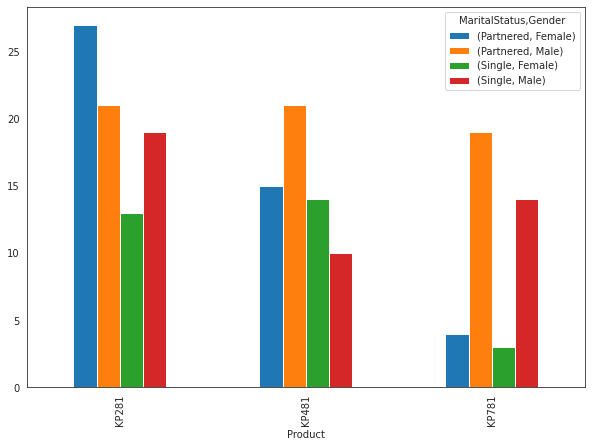

In [ ]:
prd_mar_gen.plot(kind='bar',figsize=(10,7))

**Observation**: 
* Partnered Females are using KP281 model the most. 
* Partnered Males are using all the models almost equally .
* Single Females are mostly using KP281 & KP481. 
* Single Males are using KP281,KP781 more in comparison to Single Females. While Single Females are using KP481 more in comparison to Single Males.

In [ ]:
prd_fit_gen= pd.crosstab(index=df["Fitness"],columns=[df["Product"],df["Gender"]])  
prd_fit_gen

Product  KP281       KP481       KP781     
Gender  Female Male Female Male Female Male
Fitness                                    
1            0    1      1    0      0    0
2           10    4      6    6      0    0
3           26   28     18   21      1    3
4            3    6      4    4      1    6
5            1    1      0    0      5   24

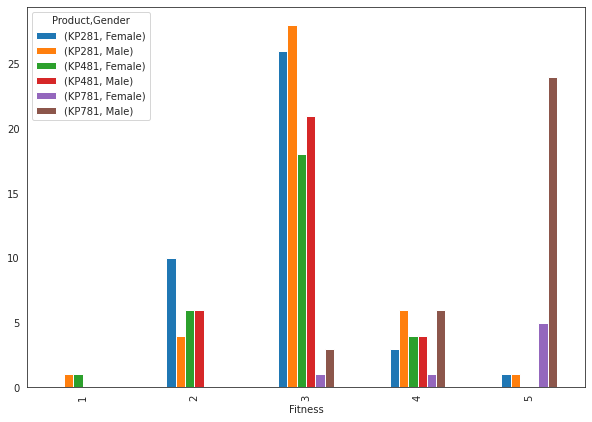

In [ ]:
prd_fit_gen.plot(kind='bar',figsize=(10,7))

**Observation**:
* Customers who have average fitness are using KP281 and KP481 mostly.
* Customers who have excellent fitness are using KP781 mostly. ( mostly males) 

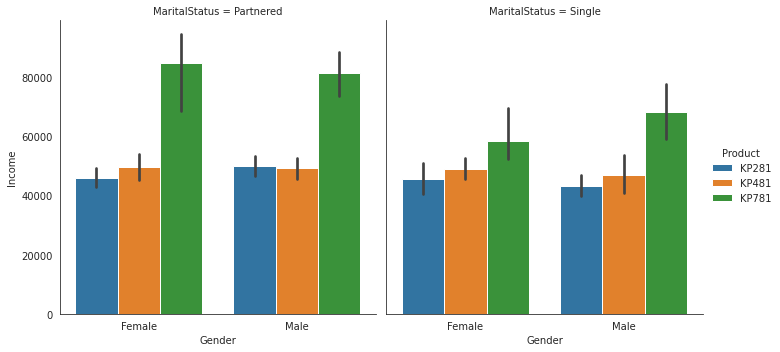

In [ ]:
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=df,kind='bar')

**Observations**

* Partnered Female bought KP281 Model compared to Partnered male.
* Single Female customers bought KP481 model more than Single male customers.
* Partnered Male customers bought KP781 model more than Single Male customers.
* There are more single males buying Treadmill than single Females.
* Single Male customers bought KP281 Model compared to Single Female.
* Majority of people who buy the KP781 are man & partnered. 


In [ ]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


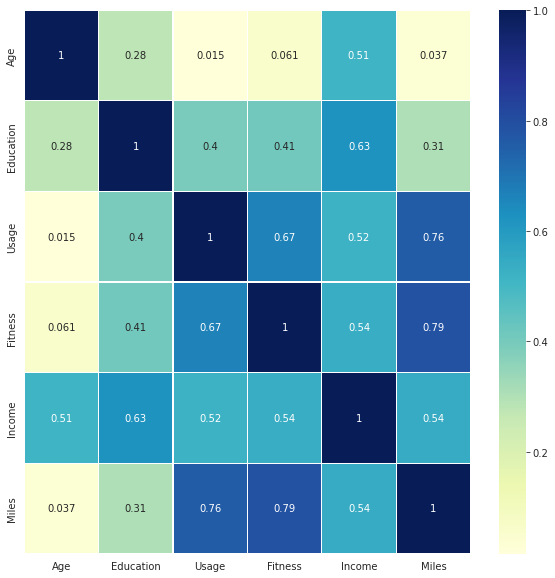

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.3,cmap="YlGnBu")
plt.show()

**Observation**

* Age and Income has some insignificant correlation
* Education and Income has very little correlation
* There is some correlation between Usage and Income
* Fitness and miles are correlated
* Miles and usage are positively correlated

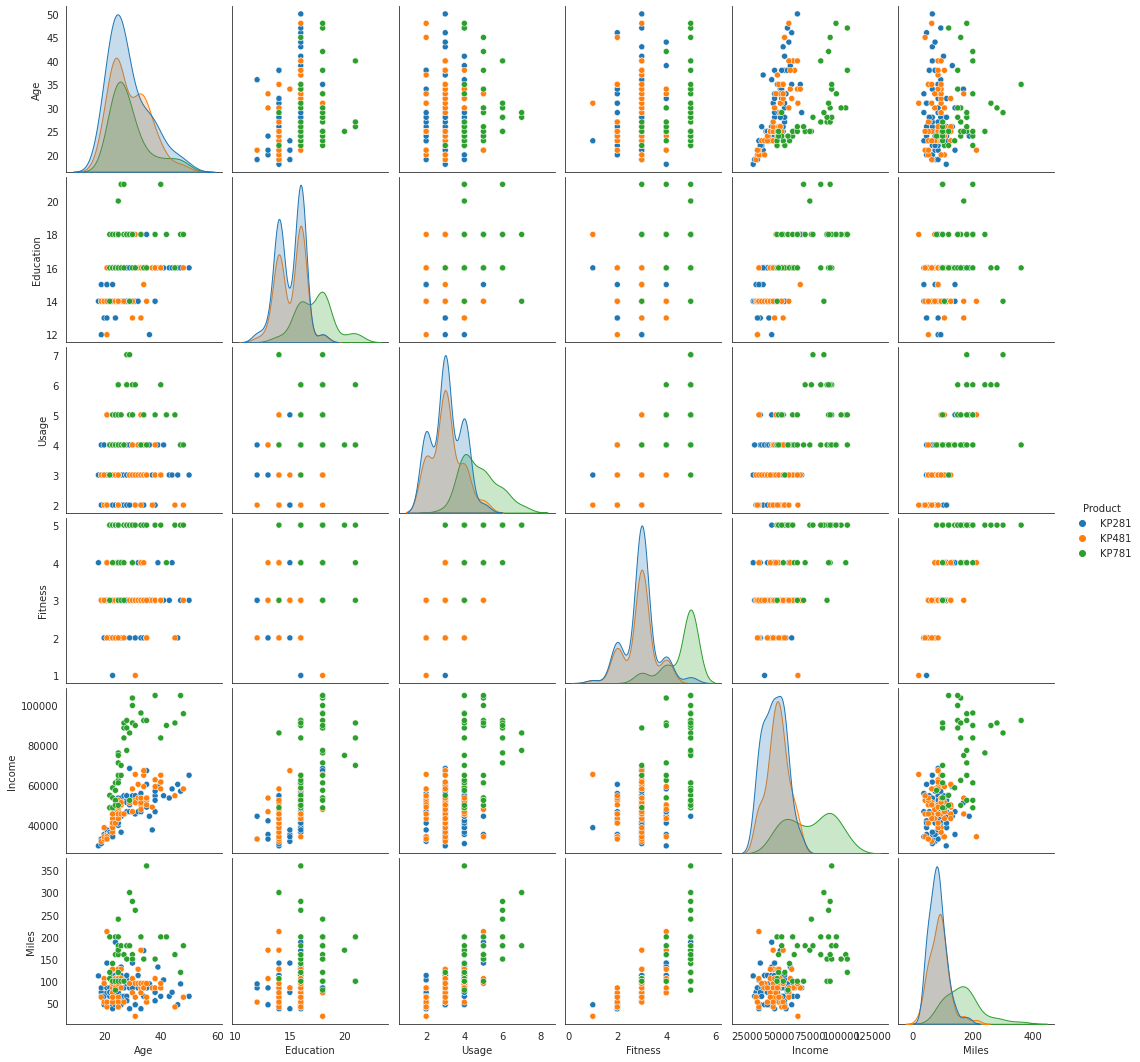

In [ ]:
sns.set_style('white')
sns.pairplot(df,hue='Product')
plt.show()

**Observations**:

* KP281 model is the most purchased model then KP481.
* KP781 is the least sold model.
* There are more Male customers than Female customers.
* Average Usage of Males is more than Average usage of Females.
* Customers buying treadmill are younger and average age of customer is almost 28.
* Most of the customers earns less than 70K and prefer KP281 & KP481 models.
* Almost 60% of the customers who purchased treadmill are partnered.
* Customers average education is 16.

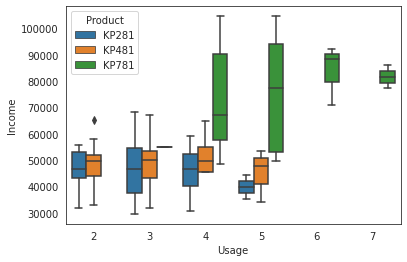

In [ ]:
sns.boxplot(x='Usage',y = 'Income',hue='Product',data=df)
plt.show()

**Observation** :
* Customers with usage 4 or 5 times a week are using KP781 model more and have high salary.
* Customers with usage 6 or 7 times a week are using KP781 model only with highest salary.

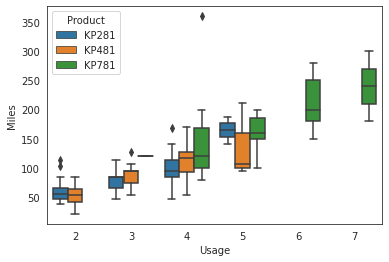

In [ ]:
sns.boxplot(x='Usage',y = 'Miles',hue='Product',data=df)
plt.show()

**Observation**:
* Customers with usage 6 or 7 times a week are using KP781 model only & running more than 200 miles on average per week.

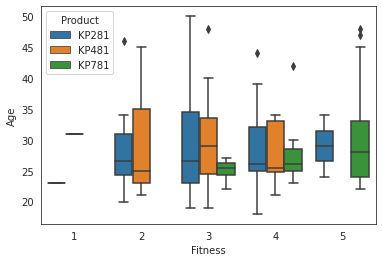

In [ ]:
sns.boxplot(x='Fitness',y = 'Age',hue='Product',data=df)
plt.show()

**Observation** : 
* Customers with poor to average Fitness are using KP281/KP481 model only with age from 18 to 35. 
* Customers with excellent fitness are using KP781 model only with Age from 22 to 45.

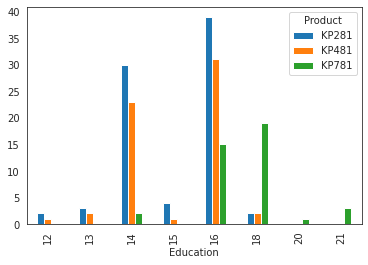

In [ ]:
pd.crosstab(df['Education'] ,df['Product']).plot(kind= 'bar')
plt.show()

**Observation** :
* Customers with Education level of 14 to 16 years are buying most of the Treadmills.

# **Outliers detection and removal**

**Income**

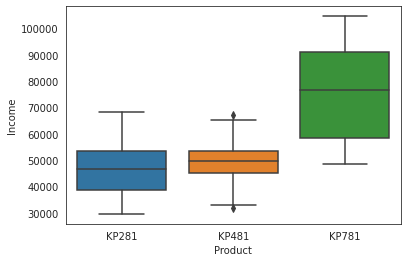

In [ ]:
sns.boxplot(data=df, x = 'Product', y = 'Income')
plt.show()

**Observations**:

* KP781 Treadmill with advanced features is preffered by the customers with higher income.
* KP281 Treadmill with the lowest cost and basic features is preffered by the customers with lower income and the KP481 product with moderate features are liked by the customers with upper bracket of low - moderate income group.


**Inference** :

* There aren't any significant outliers for Products and the Income of customers purchasing those products. So no need for outlier removal here.
* The target audience for KP781 Treadmill should be the higher income group. So the sales team must focus on this range.

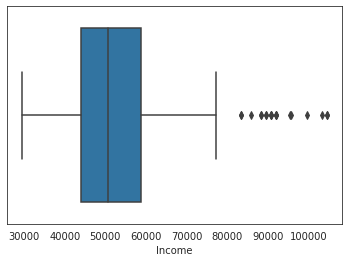

In [ ]:
sns.boxplot(data=df, x = 'Income')
plt.show()

In [ ]:
df['Income'].mean()

53719.57777777778

In [ ]:
#I have used shallow copy of our dataframe for storing it's modified version after removing autliers
q1=df['Income'].quantile(.25)
q2=df['Income'].median()
q3=df['Income'].quantile(.75)
iqr=q3-q1 
df_scopy=df[(df['Income']>q1-1.5*iqr)&(df['Income']<q3+1.5*iqr)]
df_scopy.shape

(161, 9)

In [ ]:
def detectoutlier(df, colname):
    Q3 = df[colname].quantile(0.75)
    Q1 = df[colname].quantile(0.25)
    IQR = Q3 - Q1
    outlier_left = Q1 - (1.5 * IQR)
    outlier_right = Q3 + (1.5 * IQR)
    return df[(df[colname] <= outlier_left) | (df[colname] >= outlier_right)]

In [ ]:
detectoutlier(df,"Income")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


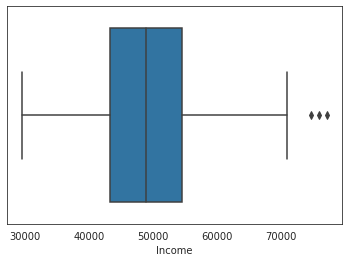

In [ ]:
#Boxplot for Income of customers purchasing products after outlier removal
sns.boxplot(data=df_scopy, x = 'Income')
plt.show()

**MILES**

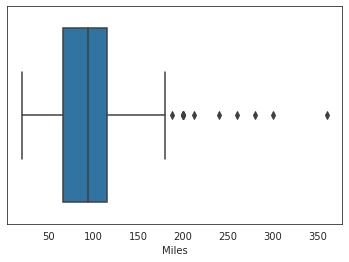

In [ ]:
df_scopy1 = df
sns.boxplot(data = df_scopy1, x = 'Miles')
plt.show()

In [ ]:
#I have used shallow copy of our dataframe for storing it's modified version after removing autliers
q1=df_scopy1['Miles'].quantile(.25)
q2=df_scopy1['Miles'].median()
q3=df_scopy1['Miles'].quantile(.75)
iqr=q3-q1 
df_scopy1=df_scopy1[(df_scopy1['Miles']>q1-1.5*iqr)&(df_scopy1['Miles']<q3+1.5*iqr)]
df_scopy1.shape

(167, 9)

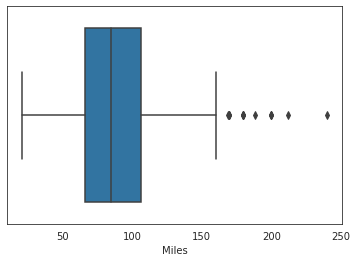

In [ ]:
sns.boxplot(data = df_scopy, x = 'Miles')
plt.show()

In [ ]:
def detectoutlier(df, colname):
    Q3 = df[colname].quantile(0.75)
    Q1 = df[colname].quantile(0.25)
    IQR = Q3 - Q1
    outlier_left = Q1 - (1.5 * IQR)
    outlier_right = Q3 + (1.5 * IQR)
    return df[(df[colname] <= outlier_left) | (df[colname] >= outlier_right)]

In [ ]:
detectoutlier(df,"Miles")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


# **Including Treadmill price in customer data**

In [ ]:
Product_Price = {'KP281' : '1500',
                'KP481' : '1750',
                'KP781' : '2500'}

In [ ]:
df['Unit Product Price'] = df['Product'].replace(to_replace = Product_Price )
df['Unit Product Price'].value_counts()

1500    80
1750    60
2500    40
Name: Unit Product Price, dtype: int64

In [ ]:
price = df['Unit Product Price'].unique()
quantity = df['Unit Product Price'].value_counts()

In [ ]:
for i in range(len(price)):
    tot_sale_USD = quantity[i] * int(price[i])
    print("Total sales for treadmills of unit price ${} is ${}".format(int(price[i]),tot_sale_USD))    

Total sales for treadmills of unit price $1500 is $120000
Total sales for treadmills of unit price $1750 is $105000
Total sales for treadmills of unit price $2500 is $100000


# **Creating Bins for Age & Income**





In [ ]:
bins=[0,14,24,40,64,100]  
bins_income = [29000, 40000, 60000, 80000,105000]
label1=['0-14','15-24','25-40','41-64','65-100']
label2=['Children',"Youth", "Young Adults","Old Adults","Seniors"]
label3 = ['Low Income','Moderate Income','High Income','Very High Income']
df['Age Groups']=pd.cut(df['Age'],bins,labels = label1)
df['Age Category']=pd.cut(df['Age'],bins,labels = label2)
df['Income Groups'] = pd.cut(df['Income'],bins_income,labels = label3)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Unit Product Price,Age Groups,Age Category,Income Groups
0,KP281,18,Male,14,Single,3,4,29562,112,1500,15-24,Youth,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,1500,15-24,Youth,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,15-24,Youth,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,1500,15-24,Youth,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,15-24,Youth,Low Income


In [ ]:
df['Age Category'].value_counts()

Young Adults    114
Youth            54
Old Adults       12
Children          0
Seniors           0
Name: Age Category, dtype: int64

In [ ]:
# Change on shallow copy(df_scopy) as well for future analysis.
df_scopy['Unit Product Price'] = df_scopy['Product'].replace(to_replace = Product_Price )
df_scopy['Unit Product Price'].value_counts()
bins=[14,24,40,64]       
label1=['14-24','25-40','41-64']
label2=["Youth", "Young Adults","Old Adults"]
df_scopy['Age Groups']=pd.cut(df_scopy['Age'],bins,labels = label1)
df_scopy['Age Category']=pd.cut(df_scopy['Age'],bins,labels = label2)
df_scopy.shape

(161, 12)

In [ ]:
df['Unit Product Price'] = df['Unit Product Price'].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Product             180 non-null    category
 1   Age                 180 non-null    int64   
 2   Gender              180 non-null    category
 3   Education           180 non-null    int64   
 4   MaritalStatus       180 non-null    category
 5   Usage               180 non-null    int64   
 6   Fitness             180 non-null    int64   
 7   Income              180 non-null    int64   
 8   Miles               180 non-null    int64   
 9   Unit Product Price  180 non-null    int64   
 10  Age Groups          180 non-null    category
 11  Age Category        180 non-null    category
 12  Income Groups       180 non-null    category
dtypes: category(6), int64(7)
memory usage: 12.0 KB


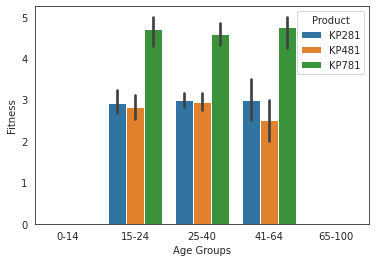

In [ ]:
sns.barplot(x='Age Groups',  y='Fitness',hue='Product',  data=df)
plt.show()

**Observation**:
* In All Age groups Fitness of people who purchased KP781 is highest. 


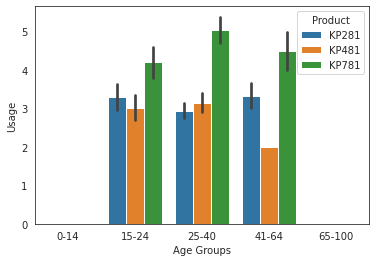

In [ ]:
sns.barplot(x='Age Groups',  y='Usage',hue='Product',  data=df)
plt.show()

**Observation**:
* In All groups users with maximum uses are buying High end model(KP781).

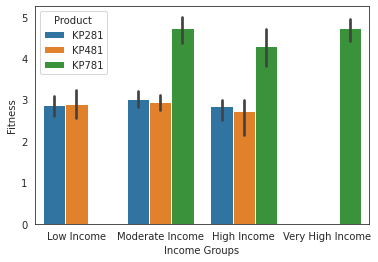

In [ ]:
sns.barplot(x='Income Groups',  y='Fitness',hue='Product',  data=df)
plt.show()

**Observation**:
* Customers with Moderate, High, Very High Income are buying KP781.
* Customers with Very High Income are buying KP781 only. 
* Customers with Low Income are buying KP281, KP481 only.


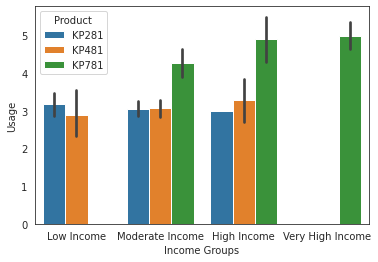

In [ ]:
sns.barplot(x='Income Groups',  y='Usage',hue='Product',  data=df)
plt.show()

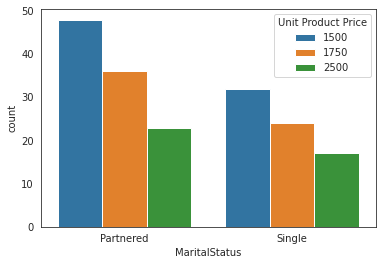

In [ ]:
sns.countplot(x='MaritalStatus',hue='Unit Product Price',data=df)
plt.show()


**Observation**:
* KP281 is most popular among Partnered as well as Single customers.
* Partnered Customers are buying more treadmill of each model in comparison to Single customers.

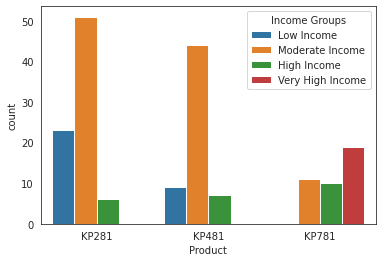

In [ ]:
sns.countplot(x='Product',hue='Income Groups',data=df)
plt.show()

# **Analysis using two-way Contingency Tables**

# **Marginal Probabilities**



In [ ]:
print(df[['Product','Gender']].value_counts().sort_index())

Product  Gender
KP281    Female    40
         Male      40
KP481    Female    29
         Male      31
KP781    Female     7
         Male      33
dtype: int64


In [ ]:
marg_prob1 = round(pd.crosstab(index=df['Age Groups'],columns=df['Product'],margins=True,normalize=True)*100,2)
marg_prob1

Product,KP281,KP481,KP781,All
Age Groups,,,,
15-24,15.00,9.44,5.56,30.00
25-40,26.11,22.78,14.44,63.33
41-64,3.33,1.11,2.22,6.67
All,44.44,33.33,22.22,100.00


**Observations**:
* Youths buying KP281 are almost 15% of all buyers. 
* Young adults buying KP281 are Almost 26% of all buyers. while young adults buying KP481 are almost 23% of all buyers.
* Young adults are almost 64% of all buyers.

In [ ]:
marg_prob2 = round(pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],margins=True,normalize=True)*100,2)
marg_prob2

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.67,20.00,12.78,59.44
Single,17.78,13.33,9.44,40.56
All,44.44,33.33,22.22,100.00


**Observations**:
* Partnered customers are buying almost 60% of the treadmill.
* Partnered Customers buying KP281 are almost 27% of all. 
* Partnered Customers buying KP481 are 20% of all.


In [ ]:
marg_prob3 = round(pd.crosstab(index=df['Income Groups'],columns=df['Product'],margins=True,normalize=True)*100,2)
marg_prob3

Product,KP281,KP481,KP781,All
Income Groups,,,,
Low Income,12.78,5.00,0.00,17.78
Moderate Income,28.33,24.44,6.11,58.89
High Income,3.33,3.89,5.56,12.78
Very High Income,0.00,0.00,10.56,10.56
All,44.44,33.33,22.22,100.00


**Observations**:
* Customers with Moderate income are buying almost 60 % of all tredmills.
* Customers with High & Very High Income are buying almost 14% of all treadmills and mostly using KP781 model.
* Customers with low income are buying almost 18 % of all treadmills but mostly using KP281 model. 




In [ ]:
pd.crosstab(df['Gender'], df['Product'], margins= True,normalize = 'all')

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


**Observation**: 
* Equal number of customers who purchased KP281 were Male as well as Female.
* Number of customers who purchased KP481 were more Males than Females.
* There are considerably more Males than there are Females who purchased KP781.

In [ ]:
round(pd.crosstab(df['Fitness'], df['Product'],margins= True,normalize = 'all')*100, 2)

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.56,0.56,0.00,1.11
2,7.78,6.67,0.00,14.44
3,30.00,21.67,2.22,53.89
4,5.00,4.44,3.89,13.33
5,1.11,0.00,16.11,17.22
All,44.44,33.33,22.22,100.00


**Observation**:
* Customers with average fitness are buying almost 54% of all the treadmills.
(30 % KP281 & 22 % KP481) 
* Customers with average to excellent fitness are buying almost 84% of all the treadmills. 
* Customers with excellent fitness are buying almost 17% of all the treadmills.( mostly KP781) 

In [ ]:
round(pd.crosstab(df['Education'], df['Product'],margins= True, normalize = 'all')*100, 2)

Product,KP281,KP481,KP781,All
Education,,,,
12,1.11,0.56,0.00,1.67
13,1.67,1.11,0.00,2.78
14,16.67,12.78,1.11,30.56
15,2.22,0.56,0.00,2.78
16,21.67,17.22,8.33,47.22
18,1.11,1.11,10.56,12.78
20,0.00,0.00,0.56,0.56
21,0.00,0.00,1.67,1.67
All,44.44,33.33,22.22,100.00


**Observation**:
* Customers with Education level of 14 years are buying almost 30% of all sales. (KP281(17% ) & KP481(13%)mostly).  
* Customers with Education level of 16 years are buying almost 47% of all sales (KP281(17% ) & KP481(13%)mostly)
* Customers with Education level of 18 and above are mostly buying KP781( almost 13%)

In [ ]:
round(pd.crosstab(df['Usage'], df['Product'],margins= True,normalize = 'all')*100, 2)

Product,KP281,KP481,KP781,All
Usage,,,,
2,10.56,7.78,0.00,18.33
3,20.56,17.22,0.56,38.33
4,12.22,6.67,10.00,28.89
5,1.11,1.67,6.67,9.44
6,0.00,0.00,3.89,3.89
7,0.00,0.00,1.11,1.11
All,44.44,33.33,22.22,100.00


In [ ]:
bins = [0, 125, 200, 450]
labels = ['0 to 125', '126 to 200', '201 to 450']
df['MileGroup'] = pd.cut(df['Miles'], bins, labels = labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Unit Product Price,Age Groups,Age Category,Income Groups,MileGroup
0,KP281,18,Male,14,Single,3,4,29562,112,1500,15-24,Youth,Low Income,0 to 125
1,KP281,19,Male,15,Single,2,3,31836,75,1500,15-24,Youth,Low Income,0 to 125
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,15-24,Youth,Low Income,0 to 125
3,KP281,19,Male,12,Single,3,3,32973,85,1500,15-24,Youth,Low Income,0 to 125
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,15-24,Youth,Low Income,0 to 125


In [ ]:
round(pd.crosstab(df['MileGroup'], df['Product'],margins= True,normalize = 'all')*100, 2)

Product,KP281,KP481,KP781,All
MileGroup,,,,
0 to 125,41.11,28.89,6.67,76.67
126 to 200,3.33,3.89,12.78,20.00
201 to 450,0.00,0.56,2.78,3.33
All,44.44,33.33,22.22,100.00


**Observations**:
* Customers running/walking on average less than 125 miles per week are buying almost 77 % of all treadmills. (KP281(41% almost) & KP481(29% almost).
* Customers running/walking on average 126-200 miles per week are buying almost 20 % of all treadmills. (mostly KP781(13%)).

# **Conditional Probabilities**:


In [ ]:
round(pd.crosstab(index=df['Age Groups'],columns=df['Product'],margins=True,normalize= 'columns')*100,2)

Product,KP281,KP481,KP781,All
Age Groups,,,,
15-24,33.75,28.33,25.0,30.00
25-40,58.75,68.33,65.0,63.33
41-64,7.50,3.33,10.0,6.67


* Given Customers of age group 15-24 





In [ ]:
round(pd.crosstab(df["Product"], df["MileGroup"], margins = True, normalize = "columns") * 100, 1).T

Product,KP281,KP481,KP781
MileGroup,,,
0 to 125,53.6,37.7,8.7
126 to 200,16.7,19.4,63.9
201 to 450,0.0,16.7,83.3
All,44.4,33.3,22.2


* 91.3% of customers whose average running miles per week is below 125 purchase either buy KP281 or KP481 model.

In [ ]:
round(pd.crosstab(df["Product"], df["Income Groups"], margins = True, normalize = "columns") * 100, 1).T

Product,KP281,KP481,KP781
Income Groups,,,
Low Income,71.9,28.1,0.0
Moderate Income,48.1,41.5,10.4
High Income,26.1,30.4,43.5
Very High Income,0.0,0.0,100.0
All,44.4,33.3,22.2


* Given Customers belong to Low Income group and buying KP281 are almost 72%.
* Given Customers belong to Very High Income group and buying KP781 are 100%.
* Given Customers belong to moderate Income group and buying KP281 are almost 48% and buying KP481 are almost 42%.

In [ ]:
round(pd.crosstab(df["Product"], df["Fitness"], margins = True, normalize = "columns") * 100, 1).T

Product,KP281,KP481,KP781
Fitness,,,
1,50.0,50.0,0.0
2,53.8,46.2,0.0
3,55.7,40.2,4.1
4,37.5,33.3,29.2
5,6.5,0.0,93.5
All,44.4,33.3,22.2


* 93.5% customers whose fitness level is 5 purchase high end model.
* customer whose fitness level is less than 3 purchase either KP281 or KP481 model.

In [ ]:
round(pd.crosstab(df["Product"], df["Usage"], margins = True, normalize = "columns") * 100, 1)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,57.6,53.6,42.3,11.8,0.0,0.0,44.4
KP481,42.4,44.9,23.1,17.6,0.0,0.0,33.3
KP781,0.0,1.4,34.6,70.6,100.0,100.0,22.2


* Customer whose weekly usage is more than 3 times more likely to purchase high end model.

In [ ]:
round(pd.crosstab(df["Product"], df["MaritalStatus"], margins = True, normalize = "columns") * 100, 1).T

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,44.9,33.6,21.5
Single,43.8,32.9,23.3
All,44.4,33.3,22.2


* 78.5% of partnered customers purchase either KP281 or KP481 model.
* 76.7% of single customers purchase either KP281 or KP481 model.

In [ ]:
round(pd.crosstab(df["Product"], df["Education"], margins = True, normalize = "columns") * 100, 1)

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,66.7,60.0,54.5,80.0,45.9,8.7,0.0,0.0,44.4
KP481,33.3,40.0,41.8,20.0,36.5,8.7,0.0,0.0,33.3
KP781,0.0,0.0,3.6,0.0,17.6,82.6,100.0,100.0,22.2


* 80% of customers whose education is 15 years purchase KP281 model.
* 82.6% of customers whose education is 18 years purchase high end model.
* 100% of customers whose education is greater than 18 years purchase high end model.

In [ ]:
round(pd.crosstab(df["Product"], df["Gender"], margins = True, normalize = "columns") * 100, 2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


* Second popular model among male customer is KP781

# **Customer Profiling**

**Observation**

* KP281 model is the most purchased model (44.4%) then KP481 (33.3%). KP781 is the least sold model (22.2%).
* There are more Male customers (57.8%) than Female customers (42.2%).
* Average Usage of Males is more than Average usage of Females.
* Customers buying treadmill are younger and average age of customer is 28.
* Most of the customers earns less than 70K and prefer KP281 & KP481 models.
* 59.4% of the customers who purchased treadmill are partnered.
* Customers average education is 16.


**Customer Profiles**

**For model KP281**

* Customers who bought this treadmill have income less than 60k with an average of 55K.
* This model has same level of popularity in Male customers as well as Female customers as it has same numbers of Male and Female customers.
* Average age of customer who purchases KP281 is 28.5.
* This model is popular among Bachelors as average years of education of customers for this product is 15.
* Self rate fitness level of customer is average.
* Customers expect to use this treadmill 3-4 times a week.
* It is the most popular model (in all genders) because of its appealing price and affordability with 33.3% of sales.
* Customers who bought this treadmill want fitness level atleast average and maybe they were looking for a basic treadmill with appealing price that also does the job.

**For model KP481**

* This model is second most sold model with 33.3% of sales.
* Customers with lower income purchase KP281 and KP481 model may be because of lower cost of the Treadmill.
* Average age of customer who purchases KP481 is 29.
* This model is popular among Bachelors as average years of education of customers for this product is 16.
* Customers expecting KP481 model to use less frequently but to run more miles per week on this.
* This model is popular more in Single Female customers compare to Single male customers may be because of difference in provided features or color scheme.

**For model KP781**

* This is the least sold product(22.2% sales) in company lineup of Treadmill may be because of it heafty price range making it Company's Premium product.
* This model is popular with customers having high income range as average Income is 75K .
* Average age of customer who purchases KP781 is 29.
* This model is popular among Customers with higher education as average education is 17 years.
* Treadmill may have some advanced features as people with high income are ready to spend money to buy this model
* Customers expected usage on this model is 4-5 day a week with moderate Miles to run having average 166 miles per week.
* Male customers who are more serious about fitness or Professionals buy this mode (self fitness rating 3-5).

# **Recommendations**:

* 59.4% of the customers who purchased treadmill (KP281 & KP481) are partnered. So we can target married individual with KP281 & KP481.

* Customers running/walking on average less than 125 miles per week are buying almost 77 % of all treadmills. (KP281(41% almost) & KP481(29% almost). So can target these customers with KP281/KP481. Customers above 125 miles per week on average can be targeted with High end model(KP781).

* KP281 & KP481 attracts people with income less than 60k , may be because of the cost of both models. We should market these models as a budget Treadmill for all.

* Among the low to moderate income groups, KP481 is more preferred over KP281 in terms of usage per week i.e 2-4 times/week. If the salesman, gets such insights from the customers willing to purchase treadmills, he/she should definitely pitch in the moderate range (KP481) product. 

* If the insights are w.r.t fitness and the person is moderately fit (2-4), then also, the salesman should pitch in for KP481 as it's most appealing & it has more features than basic one and less expensive than the advance one.

* This is evident from the calculations of total units sold and revenue earned by company for KP481 is USD 105000, which is nearly equal to (KP781) whose revenue is USD 100000, given the units sold for KP481 are 20 more than KP781. So to conclude, the target for the company should be to increase the overall percentage for KP481 and make it highest selling product and with the given statistics, it's bound to boost the income for AEROFIT in long run.

* The age of our customers are in the range of 18 to 35 years old. Can research if there is any scope to increase sale with customers who are more than 35 years old and target Age group of 18-35.

* KP781 should be marketed as a high end Treadmill for professionals and athletes.